# 3.b. **Report** 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..//..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

### Import packages

In [3]:
import numpy as np
import Identification.match_module as match_module
import Identification.rpc_module as rpc
import matplotlib.pyplot as plt
import Identification.histogram_module as hist_module
import Identification.dist_module as dist_module

### Load Data

In [4]:
with open('Identification/model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('Identification/query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images]

query_images_vis = [query_images[i] for i in np.array([0,4,9])]

We see shit because the code is shit

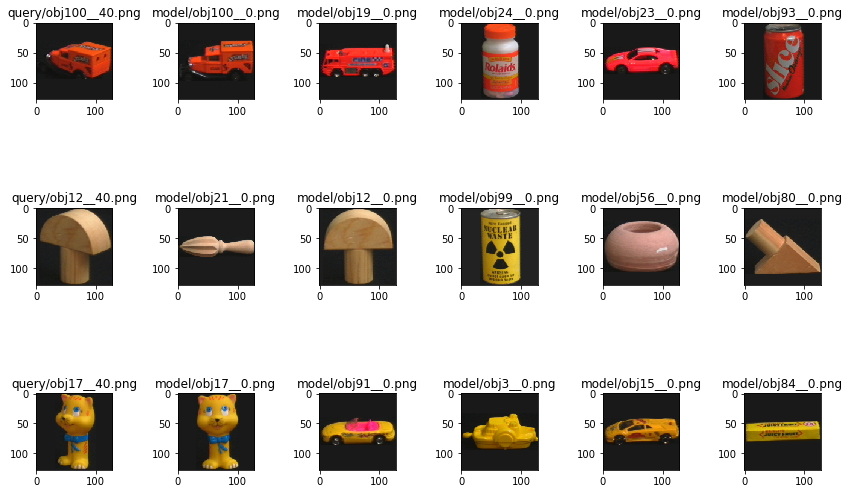

In [5]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'rg', 30)

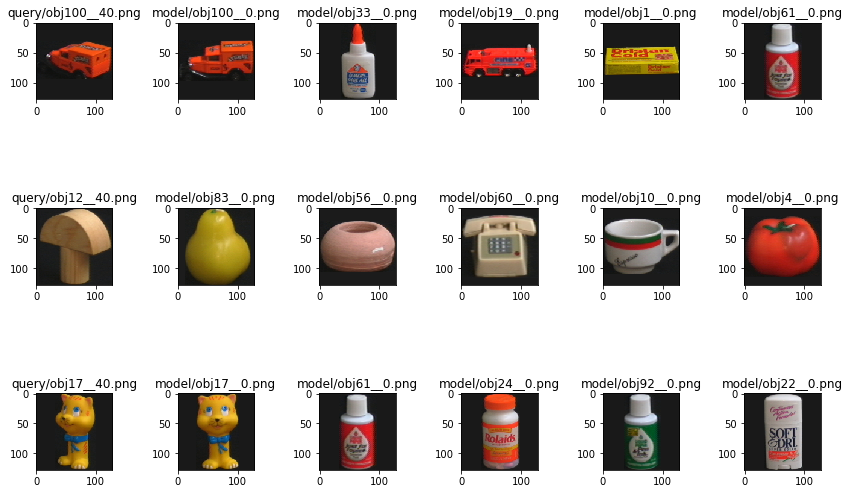

In [6]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'rg', 30)

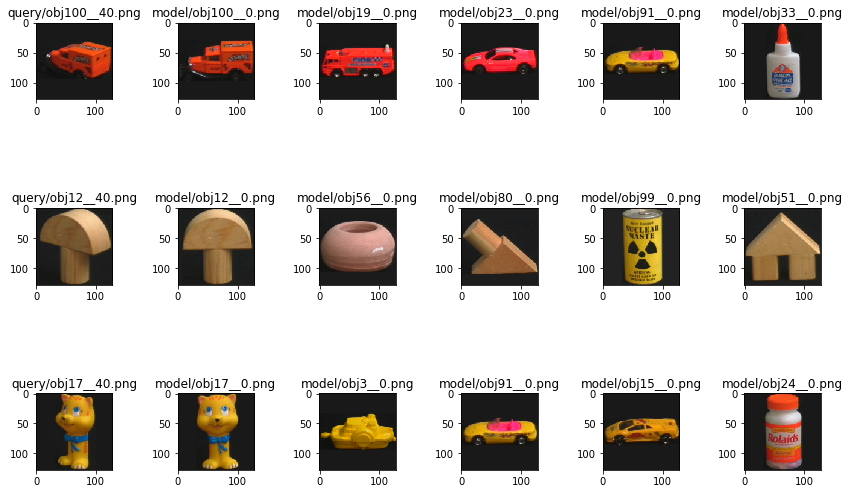

In [8]:
match_module.show_neighbors(model_images, query_images_vis, 'intersect', 'rg', 30)

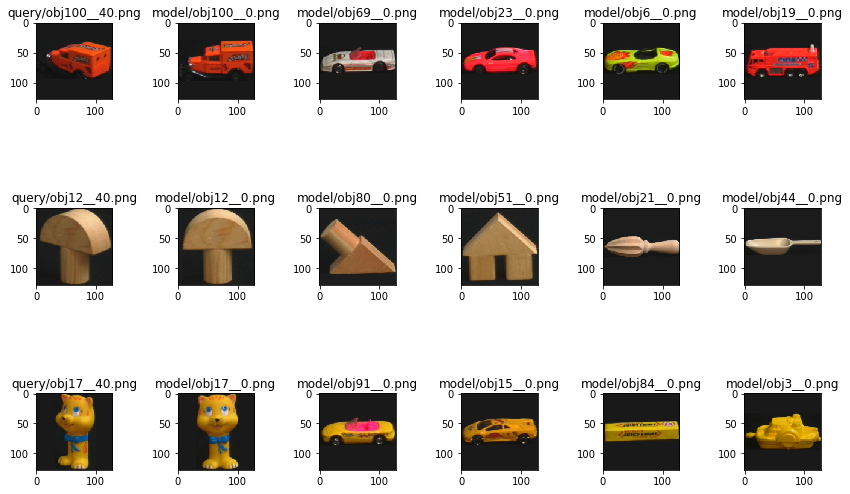

In [11]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'rgb', 30)

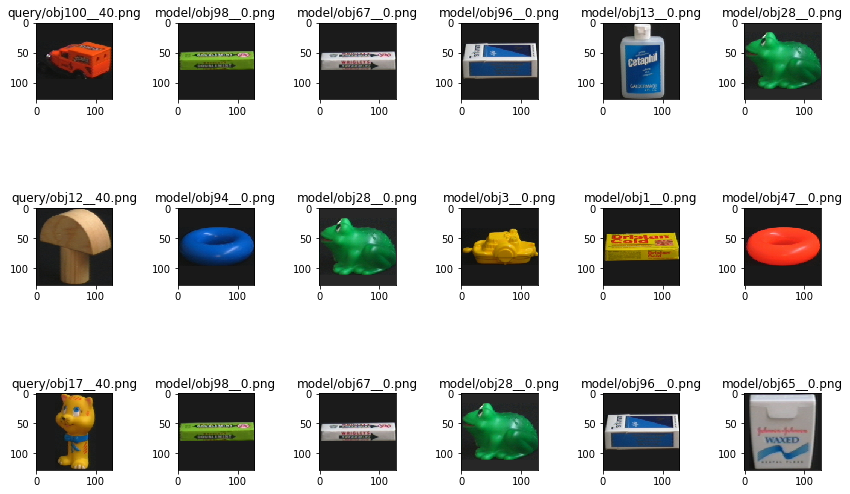

In [12]:
match_module.show_neighbors(model_images, query_images_vis, 'intersect', 'rgb', 30)

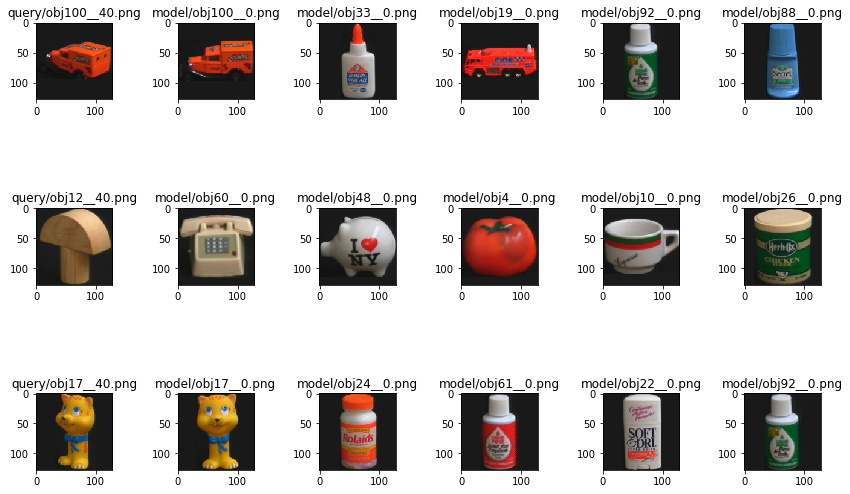

In [13]:
match_module.show_neighbors(model_images, query_images_vis, 'l2', 'rgb', 30)

In [15]:
from PIL import Image

query_red_car = np.array(Image.open('Identification/' + 'query/obj100__40.png'))
model_red_car = np.array(Image.open('Identification/' + 'model/obj100__0.png'))
model_gum = np.array(Image.open('Identification/' + 'model/obj98__0.png'))

In [130]:
from PIL import Image

query = np.array(Image.open('Identification/' + 'query/obj100__40.png'))
model = np.array(Image.open('Identification/' + 'model/obj98__0.png'))

In [131]:
num_bins = 3
query_hist_1 = hist_module.rgb_hist(query.astype('double'), num_bins)
model_hist_1 = hist_module.rgb_hist(model.astype('double'), num_bins)


<Container object of 27 artists>

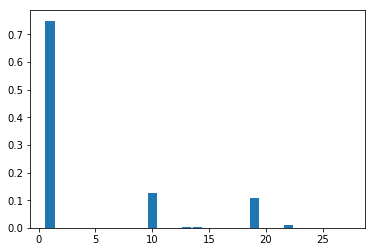

In [132]:
plt.bar(np.array(range(1, query_hist_1.size + 1)), query_hist_1)

<Container object of 27 artists>

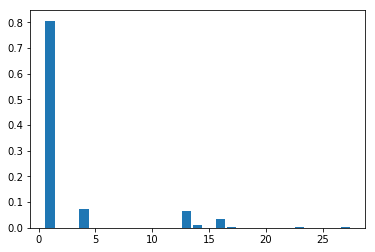

In [133]:
plt.bar(np.array(range(1, model_hist_1.size + 1)), model_hist_1)

In [134]:
print(dist_module.dist_intersect(model_hist_1, query_hist_1))

updated
0.7562255859375


In [135]:
print(np.minimum(model_hist_1, query_hist_1))

[7.49328613e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.10351562e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.44140625e-04 0.00000000e+00 0.00000000e+00
 1.64794922e-03 3.60107422e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.54492188e-04 1.22070312e-04
 0.00000000e+00 0.00000000e+00 3.66210938e-04]


In [136]:
query = np.array(Image.open('Identification/' + 'query/obj100__40.png'))
model = np.array(Image.open('Identification/' + 'model/obj100__0.png'))

In [137]:
query_hist = hist_module.rgb_hist(query.astype('double'), num_bins)
model_hist = hist_module.rgb_hist(model.astype('double'), num_bins)


<Container object of 27 artists>

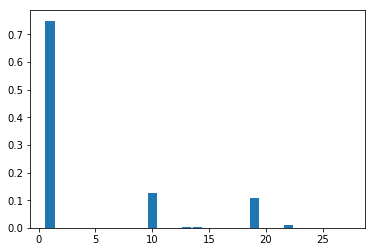

In [138]:
plt.bar(np.array(range(1, query_hist.size + 1)), query_hist)

<Container object of 27 artists>

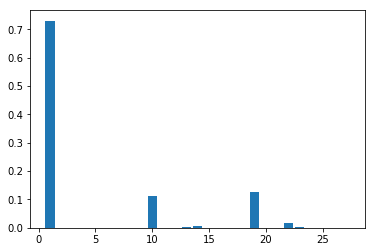

In [139]:
plt.bar(np.array(range(1, model_hist.size + 1)), model_hist)

In [140]:
print(dist_module.dist_intersect(model_hist, query_hist))

updated
0.9666748046875


In [118]:
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    # Convert color image into a 2d array
    img_color_double_reshaped = img_color_double.reshape(-1, 3)

    # Bins (these will apply over the three dimensions equally)
    bins = np.linspace(0, 255, num_bins + 1)

    # Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image
    for i in img_color_double_reshaped.tolist():
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        # Identify where the value of pixel i would fall into
        indexR_j = int(np.digitize(i[0], bins, right=False)) - 1
        indexG_j = int(np.digitize(i[1], bins, right=False)) - 1
        indexB_j = int(np.digitize(i[2], bins, right=False)) - 1        
        
        indexR = int(i[0]*5/255)
        indexG = int(i[1]*5/255)
        indexB = int(i[2]*5/255)
        
        if [indexR_j, indexG_j, indexB_j] != [indexR, indexG, indexB]:
            print(i)
            print('First:', indexR_j, indexG_j, indexB_j)
            print('Second', indexR, indexG, indexB)
        
        hists[indexR, indexG, indexB] += 1

    # Normalize the histogram such that its integral (sum) is equal 1
    hists = hists / np.sum(hists)

    # Return the histogram as a 1D vector
    
    hists_reshape = hists.reshape(hists.size)

    assert np.sum(hists_reshape) == 1, 'Histogram is not normalized'

    return hists_reshape, hists

In [90]:
from PIL import Image

img_color = np.array(Image.open('Identification/model/obj100__0.png'))

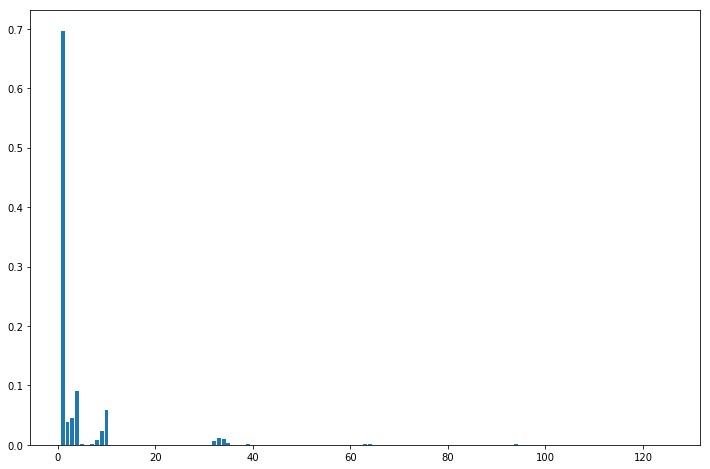

In [92]:
plt.figure(2, figsize=(12,8))

num_bins_color = 5
hist_rgb_reshaped, hist_rgb = hist_module.rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb_reshaped.size+1)),hist_rgb_reshaped)
plt.show()

16384.0


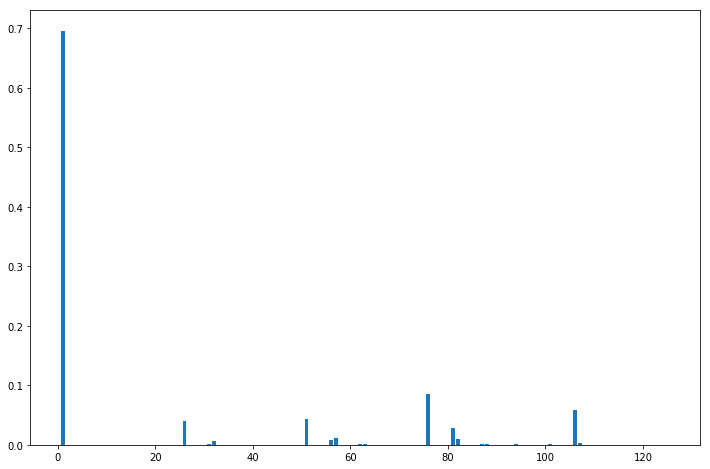

In [120]:
plt.figure(2, figsize=(12,8))

num_bins_color = 5
hist_rgb_reshaped, hist_rgb = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rgb_reshaped.size+1)),hist_rgb_reshaped)
plt.show()

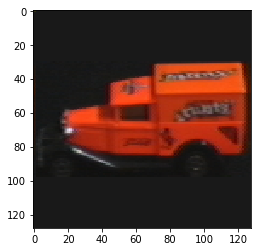

In [141]:
plt.imshow(img_color)

In [66]:
width = 126

red_image = np.zeros((width,width,3), np.uint8)
green_image = np.zeros((width,width,3), np.uint8)
blue_image = np.zeros((width,width,3), np.uint8)
mix_image = np.zeros((width,width,3), np.uint8)

red_image[:,:] = (255,0,0)
green_image[:,:] = (0,255,0)
blue_image[:,:] = (0,0,255)
mix_image[:, 0:width//3] = (255,0,0)
mix_image[:, width//3:(width//3)*2] = (0,255,0)
mix_image[:, (width//3)*2:width] = (0,0,255)

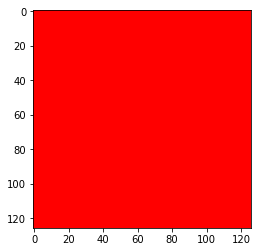

In [67]:
plt.imshow(red_image)

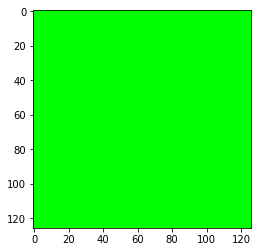

In [68]:
plt.imshow(green_image)

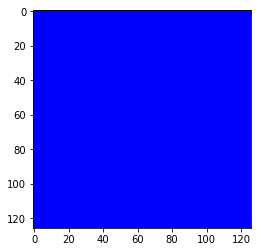

In [69]:
plt.imshow(blue_image)

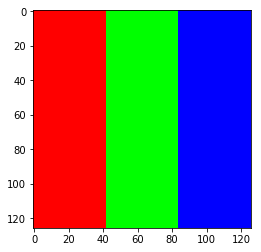

In [70]:
plt.imshow(mix_image)

In [72]:
num_bins = 5
red_hist, red_hist_3d = hist_module.rgb_hist(red_image.astype('double'), num_bins)
green_hist, green_hist_3d = hist_module.rgb_hist(green_image.astype('double'), num_bins)
blue_hist, blue_hist_3d = hist_module.rgb_hist(blue_image.astype('double'), num_bins)
mix_hist, mix_hist_3d = hist_module.rgb_hist(mix_image.astype('double'), num_bins)

red_hist_rg = hist_module.rg_hist(red_image.astype('double'), num_bins)
green_hist_rg = hist_module.rg_hist(green_image.astype('double'), num_bins)
blue_hist_rg = hist_module.rg_hist(blue_image.astype('double'), num_bins)
mix_hist_rg = hist_module.rg_hist(mix_image.astype('double'), num_bins)


In [83]:
mix_hist_3d

array([[[   0.,    0.,    0.,    0., 5292.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [5292.,    0.,    0.,    0.,    0.]],

       [[   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.]],

       [[   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.]],

       [[   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.]],

       [[5292.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.],
  

In [88]:
np.reshape(mix_hist_3d, 5*5*5, order='F')

array([   0.,    0.,    0.,    0., 5292.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 5292.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 5292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [89]:
np.reshape(mix_hist_3d, 5*5*5, order='C')

array([   0.,    0.,    0.,    0., 5292.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 5292.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 5292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])

<Container object of 125 artists>

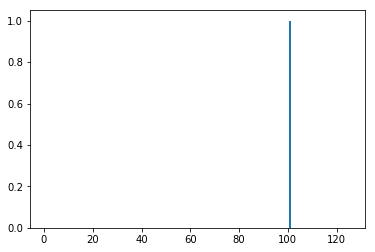

In [73]:
plt.bar(np.array(range(1, red_hist.size + 1)), red_hist)

<Container object of 125 artists>

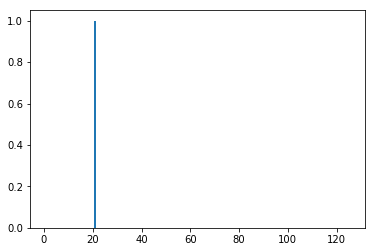

In [74]:
plt.bar(np.array(range(1, green_hist.size + 1)), green_hist)

<Container object of 125 artists>

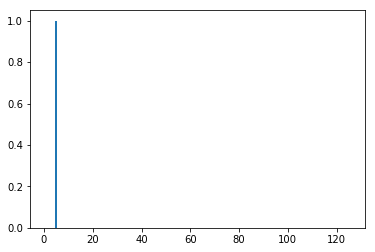

In [75]:
plt.bar(np.array(range(1, blue_hist.size + 1)), blue_hist)

<Container object of 125 artists>

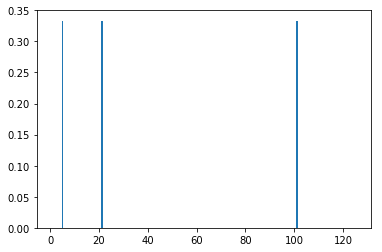

In [76]:
plt.bar(np.array(range(1, mix_hist.size + 1)), mix_hist)

<Container object of 25 artists>

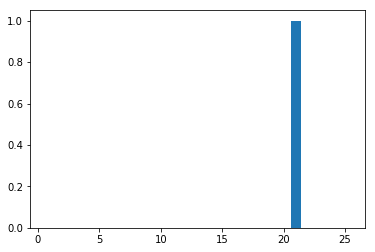

In [77]:
plt.bar(np.array(range(1, red_hist_rg.size + 1)), red_hist_rg)

<Container object of 25 artists>

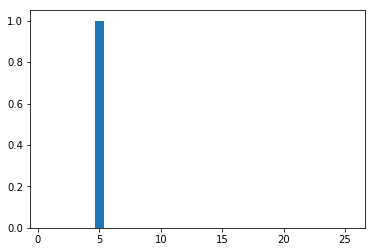

In [78]:
plt.bar(np.array(range(1, green_hist_rg.size + 1)), green_hist_rg)

<Container object of 25 artists>

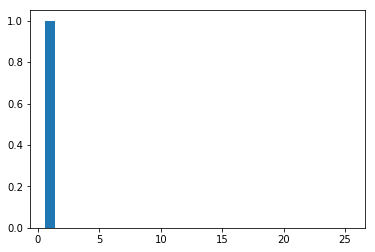

In [79]:
plt.bar(np.array(range(1, blue_hist_rg.size + 1)), blue_hist_rg)

<Container object of 25 artists>

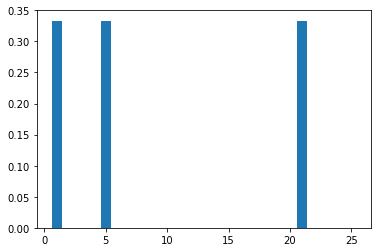

In [80]:
plt.bar(np.array(range(1, mix_hist_rg.size + 1)), mix_hist_rg)

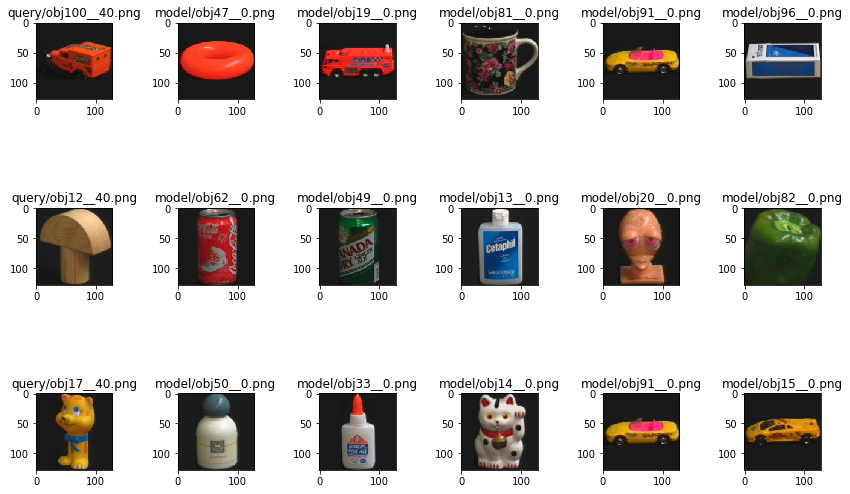

In [99]:
match_module.show_neighbors(model_images, query_images_vis, 'chi2', 'dxdy', 30)